In [86]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.linear_model import Lasso,Ridge,ridge_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import catboost
from catboost import CatBoostRegressor

In [2]:
#importing train set,test set, sample submission
train=pd.read_csv('C:/Users/Sharon/Downloads/train_F3fUq2S.csv')
test=pd.read_csv('C:/Users/Sharon/Downloads/test_Bk2wfZ3.csv')
sample_submission=pd.read_csv('C:/Users/Sharon/Downloads/sample_submission_LJ2N3ZQ.csv')

In [3]:
#copy of dataset
df_train=train.copy()
df_test=test.copy()

In [4]:
#checking first 5 rows of train set
df_train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [5]:
##checking first 5 rows of train set
df_test.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,...,40,0,0,0,0,0,0,0,0,14


In [6]:
#checking 5rows of sample submission
sample_submission.head()

,campaign_id,click_rate
0,1889,0.043454
1,1890,0.043454
2,1891,0.043454
3,1892,0.043454
4,1893,0.043454


## Data Information

In [7]:
#checking shape of train and test set
print('Shape of train set',df_train.shape)
print('Shape of test set',df_test.shape)

Shape of train set (1888, 22)
Shape of test set (762, 21)


In [8]:
#checking datatypes in train set
df_train.dtypes

campaign_id             int64
sender                  int64
subject_len             int64
body_len                int64
mean_paragraph_len      int64
day_of_week             int64
is_weekend              int64
times_of_day           object
category                int64
product                 int64
no_of_CTA               int64
mean_CTA_len            int64
is_image                int64
is_personalised         int64
is_quote                int64
is_timer                int64
is_emoticons            int64
is_discount             int64
is_price                int64
is_urgency              int64
target_audience         int64
click_rate            float64
dtype: object

In [9]:
#checking datatypes in test set
df_test.dtypes

campaign_id            int64
sender                 int64
subject_len            int64
body_len               int64
mean_paragraph_len     int64
day_of_week            int64
is_weekend             int64
times_of_day          object
category               int64
product                int64
no_of_CTA              int64
mean_CTA_len           int64
is_image               int64
is_personalised        int64
is_quote               int64
is_timer               int64
is_emoticons           int64
is_discount            int64
is_price               int64
is_urgency             int64
target_audience        int64
dtype: object

In [10]:
#some categorical variables are considered as numerical variables, let's correct thos incorrect datatypes(train set)
df_train['is_weekend'] = df_train['is_weekend'].astype('object')
df_train['is_image'] = df_train['is_image'].astype('object')
df_train['is_personalised'] = df_train['is_personalised'].astype('object')
df_train['is_quote'] = df_train['is_quote'].astype('object')
df_train['is_timer'] = df_train['is_timer'].astype('object')
df_train['is_emoticons'] = df_train['is_emoticons'].astype('object')
df_train['is_discount'] = df_train['is_discount'].astype('object')
df_train['is_price'] = df_train['is_price'].astype('object')
df_train['is_urgency'] = df_train['is_urgency'].astype('object')
df_train['day_of_week'] = df_train['day_of_week'].astype('object')

In [11]:
#checking datatypes after changing incorrect datatypes in train set
df_train.dtypes 

campaign_id             int64
sender                  int64
subject_len             int64
body_len                int64
mean_paragraph_len      int64
day_of_week            object
is_weekend             object
times_of_day           object
category                int64
product                 int64
no_of_CTA               int64
mean_CTA_len            int64
is_image               object
is_personalised        object
is_quote               object
is_timer               object
is_emoticons           object
is_discount            object
is_price               object
is_urgency             object
target_audience         int64
click_rate            float64
dtype: object

In [12]:
#some categorical variables are considered as numerical variables, let's correct thos incorrect datatypes(test set)
df_test['is_weekend'] = df_test['is_weekend'].astype('object')
df_test['is_image'] = df_test['is_image'].astype('object')
df_test['is_personalised'] = df_test['is_personalised'].astype('object')
df_test['is_quote'] = df_test['is_quote'].astype('object')
df_test['is_timer'] = df_test['is_timer'].astype('object')
df_test['is_emoticons'] = df_test['is_emoticons'].astype('object')
df_test['is_discount'] = df_test['is_discount'].astype('object')
df_test['is_price'] = df_test['is_price'].astype('object')
df_test['is_urgency'] = df_test['is_urgency'].astype('object')
df_test['day_of_week'] = df_test['day_of_week'].astype('object')

In [13]:
#checking datatypes after changing incorrect datatypes in test set
df_test.dtypes

campaign_id            int64
sender                 int64
subject_len            int64
body_len               int64
mean_paragraph_len     int64
day_of_week           object
is_weekend            object
times_of_day          object
category               int64
product                int64
no_of_CTA              int64
mean_CTA_len           int64
is_image              object
is_personalised       object
is_quote              object
is_timer              object
is_emoticons          object
is_discount           object
is_price              object
is_urgency            object
target_audience        int64
dtype: object

Interpretation: Now, in train and test, all variables were in correct datatypes.

In [14]:
#checking how many are numerical and categorical variables in train set and test set
print('There are',len(df_train.select_dtypes('number').columns),'numerical variabls and',
      len(df_train.select_dtypes('object').columns),'categorical variables in train set')

print('There are',len(df_test.select_dtypes('number').columns),'numerical variabls and',
      len(df_test.select_dtypes('object').columns),'categorical variables in train set')

There are 11 numerical variabls and 11 categorical variables in train set
There are 10 numerical variabls and 11 categorical variables in train set


In [15]:
#checking info for train set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   object 
 6   is_weekend          1888 non-null   object 
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   object 
 13  is_personalised     1888 non-null   object 
 14  is_quote            1888 non-null   object 
 15  is_timer            1888 non-null   object 
 16  is_emo

In [16]:
#checking info for test set
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   campaign_id         762 non-null    int64 
 1   sender              762 non-null    int64 
 2   subject_len         762 non-null    int64 
 3   body_len            762 non-null    int64 
 4   mean_paragraph_len  762 non-null    int64 
 5   day_of_week         762 non-null    object
 6   is_weekend          762 non-null    object
 7   times_of_day        762 non-null    object
 8   category            762 non-null    int64 
 9   product             762 non-null    int64 
 10  no_of_CTA           762 non-null    int64 
 11  mean_CTA_len        762 non-null    int64 
 12  is_image            762 non-null    object
 13  is_personalised     762 non-null    object
 14  is_quote            762 non-null    object
 15  is_timer            762 non-null    object
 16  is_emoticons        762 no

In [17]:
#checking five point summary for train set(numerical variables)
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
campaign_id,1888.0,944.500000,545.162973,1.0,472.750000,944.500000,1416.250000,1888.000000
sender,1888.0,4.395657,3.277927,0.0,3.000000,3.000000,3.000000,15.000000
subject_len,1888.0,86.246292,30.143206,9.0,69.000000,83.000000,98.000000,265.000000
body_len,1888.0,14185.780191,7327.615307,23.0,9554.500000,12689.000000,17351.500000,44491.000000
mean_paragraph_len,1888.0,35.239407,28.139498,4.0,21.000000,29.000000,40.000000,286.000000
category,1888.0,9.949682,5.300719,0.0,6.000000,10.000000,15.000000,15.000000
product,1888.0,17.525424,12.369526,0.0,9.000000,12.000000,27.250000,43.000000
no_of_CTA,1888.0,4.222458,4.628348,0.0,2.000000,3.000000,5.000000,49.000000
mean_CTA_len,1888.0,30.233051,11.848663,0.0,23.000000,29.000000,35.000000,162.000000
target_audience,1888.0,11.634534,2.949121,0.0,12.000000,12.000000,12.000000,16.000000


In [18]:
#checking five summary for train set(categorical variables)
df_train.describe(include='object')

,day_of_week,is_weekend,times_of_day,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency
count,1888,1888,1888,1888,1888,1888,1888,1888,1888,1888,1888
unique,7,2,3,6,2,7,1,6,2,8,2
top,3,0,Evening,0,0,0,0,0,0,0,0
freq,346,1511,1317,716,1781,885,1888,1626,1813,1875,1676


Interpretation: Here, some of variables which we have changed the datatypes have more unique values, but we only want is if yes or No as per data, so changing those values into 1 and 0.

In [19]:
#checking what are all unique values in train set(checking as per data)
print('is_image:',df_train['is_image'].unique())
print('is_quote:',df_train['is_quote'].unique())
print('is_price:',df_train['is_price'].unique())
print('is_emoticons:',df_train['is_emoticons'].unique())

is_image: [0 1 2 6 3 4]
is_quote: [0 1 2 3 4 6 5]
is_price: [0 5499 8000 4999 1399 5000 1000 14999]
is_emoticons: [0 2 1 3 4 6]


In [20]:
#changing all unique values into 1 except those were already in 0 and 1
df_train['is_image']=df_train['is_image'].replace([2,6,3,4],[1,1,1,1])
df_train['is_quote']=df_train['is_quote'].replace([2,6,3,4,5],[1,1,1,1,1])
df_train['is_price']=df_train['is_price'].replace([5499,8000,4999,1399,5000,1000,14999],[1,1,1,1,1,1,1])
df_train['is_emoticons']=df_train['is_emoticons'].replace([2,3,4,6],[1,1,1,1])

In [21]:
#checking what are all unique values after changing
print('is_image:',df_train['is_image'].unique())
print('is_quote:',df_train['is_quote'].unique())
print('is_price:',df_train['is_price'].unique())
print('is_emoticons:',df_train['is_emoticons'].unique())

is_image: [0 1]
is_quote: [0 1]
is_price: [0 1]
is_emoticons: [0 1]


Interpretation: Now, all values were changed into 0 and 1.

In [22]:
#checking five summary for test set(numerical variables)
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
campaign_id,762.0,2269.500000,220.114743,1889.0,2079.25,2269.5,2459.75,2650.0
sender,762.0,4.249344,3.131927,1.0,3.00,3.0,3.00,15.0
subject_len,762.0,86.509186,30.586394,11.0,68.00,83.0,98.00,265.0
body_len,762.0,14184.263780,7179.056026,23.0,9697.25,12740.5,16746.00,44491.0
mean_paragraph_len,762.0,33.185039,26.889537,4.0,20.00,27.5,39.00,498.0
category,762.0,9.590551,5.314579,0.0,6.00,10.0,15.00,15.0
product,762.0,17.872703,11.786908,0.0,9.00,13.0,26.00,44.0
no_of_CTA,762.0,4.212598,3.911229,0.0,2.00,3.0,5.00,42.0
mean_CTA_len,762.0,30.154856,10.952515,0.0,24.00,29.0,35.00,96.0
target_audience,762.0,11.648294,3.034567,0.0,12.00,12.0,12.00,16.0


In [23]:
#checking five point summary for test set(categorical variables)
df_test.describe(include='object')

,day_of_week,is_weekend,times_of_day,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency
count,762,762,762,762,762,762,762,762,762,762,762
unique,7,2,3,5,2,6,1,7,2,4,2
top,2,0,Evening,1,0,0,0,0,0,0,0
freq,138,602,532,279,729,346,762,644,738,758,675


In [24]:
#checking what are all unique values in test set
print('is_image:',df_test['is_image'].unique())
print('is_quote:',df_test['is_quote'].unique())
print('is_price:',df_test['is_price'].unique())
print('is_emoticons:',df_test['is_emoticons'].unique())

is_image: [1 0 2 6 3]
is_quote: [0 1 2 3 4 5]
is_price: [0 4999 999 5000]
is_emoticons: [1 0 2 3 4 6 17]


In [25]:
#changing all unique values into 1 except those were already in 0 and 1
df_train['is_image']=df_train['is_image'].replace([2,6,3],[1,1,1])
df_train['is_quote']=df_train['is_quote'].replace([2,3,4,5],[1,1,1,1])
df_train['is_price']=df_train['is_price'].replace([4999,999,5000],[1,1,1])
df_train['is_emoticons']=df_train['is_emoticons'].replace([2,3,4,6,17],[1,1,1,1,1])

In [26]:
#checking what are all unique values after changing
print('is_image:',df_train['is_image'].unique())
print('is_quote:',df_train['is_quote'].unique())
print('is_price:',df_train['is_price'].unique())
print('is_emoticons:',df_train['is_emoticons'].unique())

is_image: [0 1]
is_quote: [0 1]
is_price: [0 1]
is_emoticons: [0 1]


Interpretation: Now, all values were changed into 0 and 1

In [27]:
#checking null values in train set
df_train.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

In [28]:
#checking null values in test set
df_test.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
dtype: int64

Interpretation: There were no null values in both train and test set.

# Exploratory Data Analysis(EDA)

## sender

<AxesSubplot:>

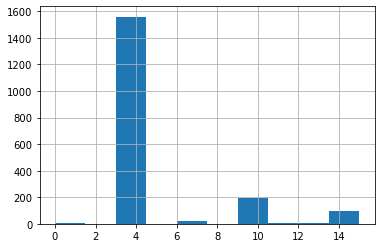

In [29]:
df_train['sender'].hist()

Interpretation: More no.of senders were from number 3 only.

## subject_len, body_len

<AxesSubplot:xlabel='subject_len', ylabel='body_len'>

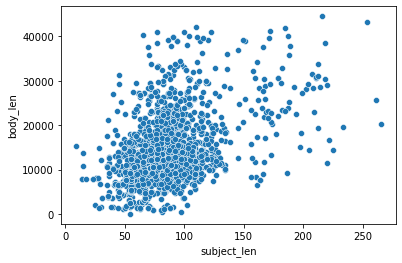

In [30]:
sns.scatterplot(x='subject_len',y='body_len',data=df_train)

Interpretation: It clearly shows that, as number of characters in a subject increases, number characters in a email body also increases.

## mean_paragraph_len

<AxesSubplot:xlabel='mean_paragraph_len'>

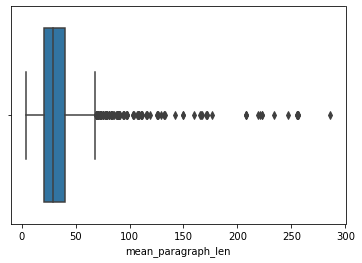

In [31]:
sns.boxplot(x='mean_paragraph_len',data=df_train)

Interpretation: The mean of the Average no.of paragraph in email is 29. And, the minimum and maximum of Average no.of paragraph in email is 4 and 286.

## day_of_week, times_of_day

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

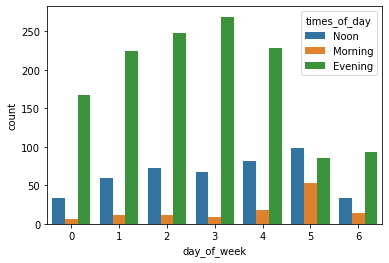

In [32]:
sns.countplot(x='day_of_week',hue='times_of_day',data=df_train)

Interpretation: Maximum no.of emails were sent in Evening in all days of week.

## mean_CTA_len, no_of_CTA

array([[<AxesSubplot:title={'center':'mean_CTA_len'}>,
        <AxesSubplot:title={'center':'no_of_CTA'}>]], dtype=object)

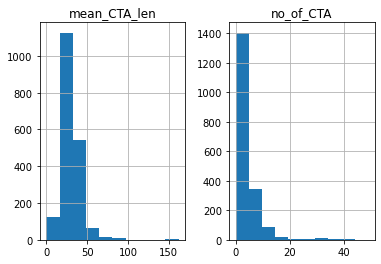

In [33]:
df_train[['mean_CTA_len','no_of_CTA']].hist()

Interpretation: The maximum no.of average no.of characters in CTA between 20 and 50. And, maximum number of emails for call to action between 0 and 10

## is_image, is_personalised, is_quote, is_price, is_timer, is_emoticons, is_discount, is_urgency

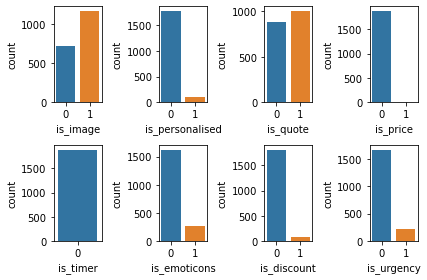

In [34]:
fig,ax = plt.subplots(2,4)

sns.countplot(x='is_image',data=df_train,ax=ax[0][0])
sns.countplot(x='is_personalised',data=df_train,ax=ax[0][1])
sns.countplot(x='is_quote',data=df_train,ax=ax[0][2])
sns.countplot(x='is_price',data=df_train,ax=ax[0][3])
sns.countplot(x='is_timer',data=df_train,ax=ax[1][0])
sns.countplot(x='is_emoticons',data=df_train,ax=ax[1][1])
sns.countplot(x='is_discount',data=df_train,ax=ax[1][2])
sns.countplot(x='is_urgency',data=df_train,ax=ax[1][3])
plt.tight_layout()
plt.show()

Interpretation: Most of emails have image. Many of the emails are not personalised. Very less no.of emails do not contain quotes. Maximum no.of emails contains price. There were no emails which contains timer. There were very less no.of emails contains emoticons. Many of the emails do not contains any discounts. There were very less number of emails contains an urgency.

## Heatmap for all numerical variables

<AxesSubplot:>

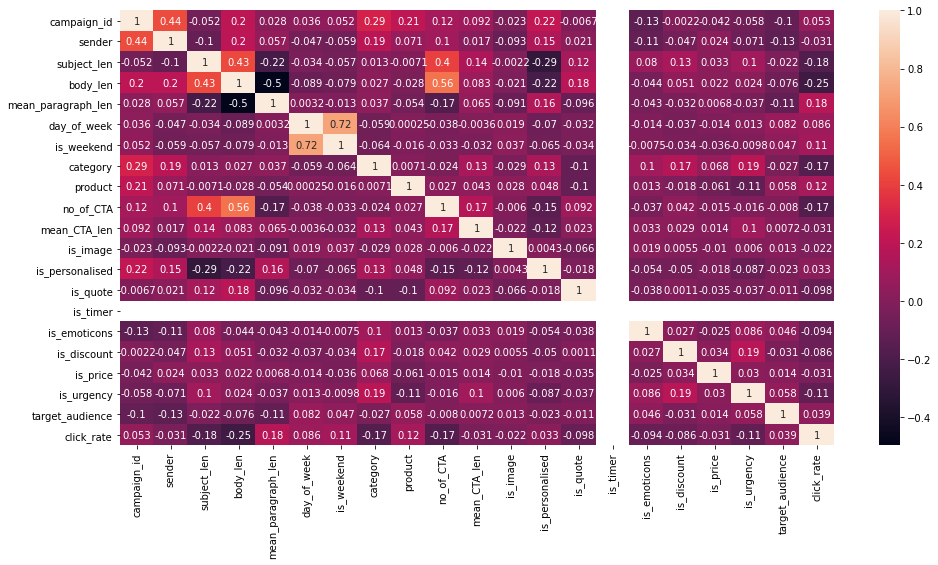

In [35]:
#Heatmap
plt.figure(figsize=(16,8))
sns.heatmap(train.corr(),annot=True)

In [36]:
#dropping redundant features in train and test set
df_train = df_train.drop(['campaign_id','is_timer','is_weekend'],axis=1)
df_test = df_test.drop(['campaign_id','is_timer','is_weekend'],axis=1)

Interpretation: This plot clearly shows that is_timer variable does not make any sense, so we need to drop the variable. And, is_weenend,day_of_week are correlated to each other, so it is better to drop any one of the variable.

In [37]:
#checking shape of data after dropping redundant features
print('Shape of train data:',df_train.shape)
print('Shape of test data:',df_test.shape)

Shape of train data: (1888, 19)
Shape of test data: (762, 18)


# Data Preprocessing

In [38]:
#combining train and test set
combined=pd.concat([df_train,df_test],axis=0)
print('Shape of final dataset:',combined.shape)

Shape of final dataset: (2650, 19)


In [39]:
#encoding categorical variables
cat=combined.select_dtypes('object')
num=combined.select_dtypes('number')
dummies=pd.get_dummies(cat,drop_first=True)
df_final=pd.concat([num,dummies],axis=1)

In [40]:
#splitting independent variable and depedent variable
X_train=df_final.iloc[:1888,:].drop('click_rate',axis=1)
y_train=df_train['click_rate']


In [41]:
#new_test data for prediction
new_test=df_final.iloc[1888:,:].drop('click_rate',axis=1)

# Modelling

## Model-1

In [42]:
#checking cross validation for LinearRegression
cv_lin=cross_val_score(estimator=LinearRegression(normalize=True),X=X_train,y=y_train,cv=5)
print('Mean of Cross val score for LinearRegression:',cv_lin.mean())

Mean of Cross val score for LinearRegression: 0.029810223882129304


In [43]:
#LinearRegression model
linreg=LinearRegression(normalize=True)
linreg=linreg.fit(X_train,y_train)
pred=linreg.predict(new_test)
pred_lin=[0 if x<0 else x for x in pred]

In [44]:
#submission1
submission1=pd.DataFrame({'campaign_id':test.campaign_id,'click_rate':pred_lin})
submission1.head()

,campaign_id,click_rate
0,1889,0.065564
1,1890,0.189727
2,1891,0.074119
3,1892,0.079709
4,1893,0.096729


In [45]:
#exporting to csv file
submission1.to_csv('sample_submission_LJ2N3ZQ.csv',index=False)

## Model-2(Best Model)

In [118]:
#checking cross validation for RandomForestRegressor
cv_rf=cross_val_score(estimator=RandomForestRegressor(random_state=1),X=X_train,y=y_train,cv=5)
print('Mean of Cross val score for RandomForestRegressor:',cv_rf.mean())

Mean of Cross val score for RandomForestRegressor: 0.06379117818058913


In [119]:
#RandomForest model
rf=RandomForestRegressor(random_state=1)
rf=rf.fit(X_train,y_train)
pred=rf.predict(new_test)
pred_rf=[0 if x<0 else x for x in pred]

In [120]:
#submission2
submission2=pd.DataFrame({'campaign_id':test.campaign_id,'click_rate':pred_rf})
submission2.head()

,campaign_id,click_rate
0,1889,0.057043
1,1890,0.540817
2,1891,0.199514
3,1892,0.209006
4,1893,0.158997


In [121]:
#exporting to csv file
submission2.to_csv('sample_submission_LJ2N3ZQ.csv',index=False)

## Model-3

In [50]:
#checking cross validation for AdaBoostRegressor
ad=AdaBoostRegressor(n_estimators=30,learning_rate=0.2,random_state=50)
cv_ad=cross_val_score(estimator=ad,X=X_train,y=y_train,cv=5)
print('Mean of Cross val score for AdaBoostRegressor:',cv_ad.mean())

Mean of Cross val score for AdaBoostRegressor: 0.026286218113456862


In [51]:
#AdaBoost model
ad=AdaBoostRegressor(n_estimators=30,learning_rate=0.2,random_state=50)
ad_model=ad.fit(X_train,y_train)
pred=ad_model.predict(new_test)
pred_ad=[0 if x<0 else x for x in pred]

In [52]:
#submission3
submission3=pd.DataFrame({'campaign_id':test.campaign_id,'click_rate':pred_ad})
submission3.head()

,campaign_id,click_rate
0,1889,0.031158
1,1890,0.381137
2,1891,0.222169
3,1892,0.238007
4,1893,0.078909


In [53]:
#exporting to csv file
submission3.to_csv('sample_submission_LJ2N3ZQ.csv',index=False)

## Model-4

In [100]:
#tuning hyperparameters for AdaBoostRegressor
param_grid=[{'n_estimators':[100, 120, 150, 200, 250, 300, 350],'learning_rate':[0.1, 0.01, 0.001, 0.15, 0.015]}]
tuned=RandomizedSearchCV(estimator=AdaBoostRegressor(random_state=1),param_distributions=param_grid,cv=5,
                         random_state=1)
tuned=tuned.fit(X_train,y_train)
tuned.best_params_

{'n_estimators': 100, 'learning_rate': 0.001}

In [102]:
#checking cross validation for AdaBoostRegressor with hyperparameters
cv_tuned=cross_val_score(AdaBoostRegressor(n_estimators=100,learning_rate=0.001,random_state=1),X=X_train,
                         y=y_train,cv=5)
print('Mean of Cross val score for AdaBoostRegressor:',cv_tuned.mean())

Mean of Cross val score for AdaBoostRegressor: 0.08439057165288352


In [103]:
#AdaBoostRegressor with tuned hyperparameters
ad_tuned=AdaBoostRegressor(n_estimators=40,learning_rate=0.1,random_state=50)
ad_tuned=ad_tuned.fit(X_train,y_train)
pred=ad_tuned.predict(new_test)
pred_tuned=[0 if x<0 else x for x in pred]

In [104]:
#submission4
submission4=pd.DataFrame({'campaign_id':test.campaign_id,'click_rate':pred_tuned})
submission4.head()

,campaign_id,click_rate
0,1889,0.033828
1,1890,0.374334
2,1891,0.227953
3,1892,0.227953
4,1893,0.060347


In [105]:
submission4.to_csv('sample_submission_LJ2N3ZQ.csv',index=False)

## Model-5

In [60]:
#SVR
svm=SVR()
svm=svm.fit(X_train,y_train)
pred=svm.predict(new_test)
pred_svm=[0 if x<0 else x for x in pred]

In [61]:
#submission5
submission5=pd.DataFrame({'campaign_id':test.campaign_id,'click_rate':pred_svm})
submission5.head()

,campaign_id,click_rate
0,1889,0.101861
1,1890,0.117159
2,1891,0.126398
3,1892,0.126398
4,1893,0.101050


In [62]:
submission5.to_csv('sample_submission_LJ2N3ZQ.csv',index=False)

## Model-6

In [63]:
#catboost
cb=CatBoostRegressor(random_state=42)
cb=cb.fit(X_train,y_train)
pred=cb.predict(new_test)
pred_cb=[0 if x<0 else x for x in pred]

Learning rate set to 0.045268
0:	learn: 0.0831208	total: 144ms	remaining: 2m 24s
1:	learn: 0.0820916	total: 148ms	remaining: 1m 13s
2:	learn: 0.0809642	total: 150ms	remaining: 49.9s
3:	learn: 0.0799537	total: 153ms	remaining: 38.1s
4:	learn: 0.0791854	total: 156ms	remaining: 31.1s
5:	learn: 0.0783979	total: 159ms	remaining: 26.3s
6:	learn: 0.0776200	total: 161ms	remaining: 22.9s
7:	learn: 0.0767581	total: 163ms	remaining: 20.2s
8:	learn: 0.0760702	total: 165ms	remaining: 18.2s
9:	learn: 0.0753550	total: 167ms	remaining: 16.6s
10:	learn: 0.0747208	total: 169ms	remaining: 15.2s
11:	learn: 0.0740707	total: 171ms	remaining: 14.1s
12:	learn: 0.0733833	total: 174ms	remaining: 13.2s
13:	learn: 0.0727337	total: 176ms	remaining: 12.4s
14:	learn: 0.0722672	total: 178ms	remaining: 11.7s
15:	learn: 0.0716805	total: 179ms	remaining: 11s
16:	learn: 0.0711091	total: 181ms	remaining: 10.5s
17:	learn: 0.0705102	total: 183ms	remaining: 9.97s
18:	learn: 0.0699766	total: 185ms	remaining: 9.55s
19:	learn: 

In [64]:
#submission6
submission6=pd.DataFrame({'campaign_id':test.campaign_id,'click_rate':pred_cb})
submission6.head()

,campaign_id,click_rate
0,1889,0.042720
1,1890,0.672931
2,1891,0.157393
3,1892,0.169464
4,1893,0.166803


In [65]:
#exporting to csv file
submission6.to_csv('sample_submission_LJ2N3ZQ.csv',index=False)

## Model-7

In [67]:
#tuning hyperparameters for catboost
param=[{'iterations':[100,150,200],'learning_rate':[0.03,0.1],'depth':[2,4,6,8],'l2_leaf_reg':[0.2,0.5,1,3]}]
rcb=RandomizedSearchCV(estimator=CatBoostRegressor(random_state=1),param_distributions=param,cv=5,random_state=1)
rcb=rcb.fit(X_train,y_train)
rcb.best_params_

0:	learn: 0.0811089	total: 879us	remaining: 175ms
1:	learn: 0.0806021	total: 1.85ms	remaining: 184ms
2:	learn: 0.0798783	total: 2.96ms	remaining: 194ms
3:	learn: 0.0792799	total: 4.07ms	remaining: 200ms
4:	learn: 0.0788135	total: 4.95ms	remaining: 193ms
5:	learn: 0.0782024	total: 5.79ms	remaining: 187ms
6:	learn: 0.0777106	total: 6.68ms	remaining: 184ms
7:	learn: 0.0771622	total: 7.66ms	remaining: 184ms
8:	learn: 0.0766520	total: 8.53ms	remaining: 181ms
9:	learn: 0.0762120	total: 9.56ms	remaining: 182ms
10:	learn: 0.0758546	total: 10.5ms	remaining: 181ms
11:	learn: 0.0755396	total: 11.7ms	remaining: 184ms
12:	learn: 0.0750645	total: 12.7ms	remaining: 182ms
13:	learn: 0.0746142	total: 13.7ms	remaining: 182ms
14:	learn: 0.0741972	total: 14.5ms	remaining: 179ms
15:	learn: 0.0737653	total: 15.6ms	remaining: 179ms
16:	learn: 0.0734863	total: 16.7ms	remaining: 180ms
17:	learn: 0.0732060	total: 17.7ms	remaining: 179ms
18:	learn: 0.0728896	total: 18.7ms	remaining: 178ms
19:	learn: 0.0725195	to

{'learning_rate': 0.03, 'l2_leaf_reg': 0.2, 'iterations': 150, 'depth': 8}

In [82]:
#checking cross validation for catboost with tuned hyperparameters
cb=CatBoostRegressor(iterations=150,learning_rate=0.03,l2_leaf_reg=0.2,depth=8,random_state=1)
cv=cross_val_score(estimator=cb,X=X_train,y=train['click_rate'],cv=5)
cv.mean()

0:	learn: 0.0805713	total: 4.31ms	remaining: 642ms
1:	learn: 0.0796221	total: 8.23ms	remaining: 609ms
2:	learn: 0.0786785	total: 11.8ms	remaining: 578ms
3:	learn: 0.0779648	total: 15.6ms	remaining: 571ms
4:	learn: 0.0769759	total: 19.4ms	remaining: 564ms
5:	learn: 0.0761498	total: 23.8ms	remaining: 572ms
6:	learn: 0.0753192	total: 27.5ms	remaining: 561ms
7:	learn: 0.0743938	total: 30.9ms	remaining: 549ms
8:	learn: 0.0736400	total: 35.1ms	remaining: 550ms
9:	learn: 0.0725496	total: 40.5ms	remaining: 567ms
10:	learn: 0.0716717	total: 44.3ms	remaining: 560ms
11:	learn: 0.0708507	total: 47.9ms	remaining: 551ms
12:	learn: 0.0701908	total: 52.9ms	remaining: 557ms
13:	learn: 0.0693022	total: 56.3ms	remaining: 547ms
14:	learn: 0.0685819	total: 59.7ms	remaining: 537ms
15:	learn: 0.0677784	total: 63.5ms	remaining: 532ms
16:	learn: 0.0671470	total: 67.7ms	remaining: 529ms
17:	learn: 0.0666095	total: 70.8ms	remaining: 519ms
18:	learn: 0.0658763	total: 74ms	remaining: 510ms
19:	learn: 0.0652164	tot

0.17701401481702125

In [83]:
#catboost with hyperparameter
cb_tuned=CatBoostRegressor(iterations=100,learning_rate=0.03,depth=8,l2_leaf_reg=3,random_state=1)
cb_tuned=cb_tuned.fit(X_train,y_train)
pred=cb_tuned.predict(new_test)
pred_cbt=[0 if x<0 else x for x in pred]

0:	learn: 0.0834232	total: 4.87ms	remaining: 483ms
1:	learn: 0.0827823	total: 9.37ms	remaining: 459ms
2:	learn: 0.0820317	total: 13.7ms	remaining: 443ms
3:	learn: 0.0814087	total: 17.8ms	remaining: 427ms
4:	learn: 0.0807304	total: 22.1ms	remaining: 419ms
5:	learn: 0.0801152	total: 27.2ms	remaining: 426ms
6:	learn: 0.0794251	total: 32ms	remaining: 425ms
7:	learn: 0.0787110	total: 36.2ms	remaining: 416ms
8:	learn: 0.0781623	total: 40.6ms	remaining: 410ms
9:	learn: 0.0776210	total: 44.5ms	remaining: 401ms
10:	learn: 0.0770075	total: 48.4ms	remaining: 392ms
11:	learn: 0.0762736	total: 53.7ms	remaining: 394ms
12:	learn: 0.0757672	total: 59.2ms	remaining: 396ms
13:	learn: 0.0751672	total: 64.8ms	remaining: 398ms
14:	learn: 0.0745638	total: 71.7ms	remaining: 406ms
15:	learn: 0.0740434	total: 75.6ms	remaining: 397ms
16:	learn: 0.0735316	total: 79.3ms	remaining: 387ms
17:	learn: 0.0730052	total: 82.8ms	remaining: 377ms
18:	learn: 0.0725201	total: 87ms	remaining: 371ms
19:	learn: 0.0720532	total

In [84]:
#submission7
submission7=pd.DataFrame({'campaign_id':test.campaign_id,'click_rate':pred_cbt})
submission7.head()

,campaign_id,click_rate
0,1889,0.053037
1,1890,0.399537
2,1891,0.183788
3,1892,0.184732
4,1893,0.072367


In [85]:
#exporting to csv file
submission7.to_csv('sample_submission_LJ2N3ZQ.csv',index=False)

## Model-8

In [73]:
#checking cross validation for ridge
ridge=Ridge(random_state=1,normalize=True)

cv=cross_val_score(estimator=ridge,X=X_train,y=y_train,cv=5)
cv.mean()

0.08596611472858995

In [74]:
#ridge
rid=Ridge(normalize=True,random_state=1)
rid=rid.fit(X_train,y_train)
pred=rid.predict(new_test)
pred_rid=[0 if x<0 else x for x in pred]

In [75]:
#submission8
submission8=pd.DataFrame({'campaign_id':test.campaign_id,'click_rate':pred_rid})
submission8.head()

,campaign_id,click_rate
0,1889,0.055230
1,1890,0.136672
2,1891,0.063983
3,1892,0.066339
4,1893,0.071797


In [76]:
#exporting to csv file
submission8.to_csv('sample_submission_LJ2N3ZQ.csv',index=False)

## Model-9

In [106]:
#hyperparameter tuning for kneighbors
knn=KNeighborsRegressor()
param=[{'n_neighbors':[10,15,20,25,30]}]
tuning=RandomizedSearchCV(estimator=knn,param_distributions=param,cv=5,random_state=1)
tuning=tuning.fit(X_train,y_train)
tuning.best_params_

{'n_neighbors': 15}

In [107]:
#checking cross validation for kneighborsregressor
knn=KNeighborsRegressor(n_neighbors=15)
cv=cross_val_score(estimator=knn,X=X_train,y=y_train,cv=5)
cv.mean()

0.05419777541505368

In [109]:
#kneighbors regressor with hyperparameter tuning
knn=KNeighborsRegressor(n_neighbors=15)
knn=knn.fit(X_train,y_train)
pred=knn.predict(new_test)
pred_knn=[0 if x<0 else x for x in pred]

In [110]:
#submission9
submission9=pd.DataFrame({'campaign_id':test.campaign_id,'click_rate':pred_knn})
submission9.head()

,campaign_id,click_rate
0,1889,0.010309
1,1890,0.322294
2,1891,0.183530
3,1892,0.183530
4,1893,0.043253


In [111]:
#exporting to csv file
submission9.to_csv('sample_submission_LJ2N3ZQ.csv',index=False)